<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/Week5_DEM_Solar_llumination_Shapefiles_hillshade_contours_Final_2020_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GEOL557 Week 5 Group Project

Characterization of the Lunar LCROSS volatile measurements and adjacent area

Britt Duffy Adkins, Hunter Danque, Deniz Donmez (November 20, 2020)

The LCROSS impact in the Cabeus crater and spectroscopic analysis of the ejecta plume is the only "ground truth" of volatiles in Lunar Permanently Shadowed Regions (PSRs). As such, it is used as a baseline for molecular abundance in PSRs at both lunar poles. Our goal is to take a more conservative approach and map the critical environmental characteristics of PSRs, Illumination, Temperature, Topography, and distance weighting from the LCROSS site to have a semi-quantitative view of how far that "one" measurement can be extrapolated within the Cabeus crater. 
We calculated and plot the Molecular and Elemental abundance from the LCROSS spectroscopic measurements. Most lunar resource work focuses on the water observed (~5% by weight) and Hydrogen and Oxygen for rocket fuel use. We want to show there are other valuable elemental resources observed in the ejecta plume, although some valuable elements like Carbon are in multiple molecules.


#Feedback Action Items
*   Color the bar plots
*   Remove grid on bar plots
*   Post values on the bar plots
*   Add PSRs to legend on map plots
*   Add contour labels on the contour lines
*   Add Contour to Legend

All of these suggestions were implemented 







In [1]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Mounted at /content/gdrive


#Section 1-LCROSS Comparison of Molecular and Atomic Weight Percent

The goal of the first section is to make a dataframe of the molecular abundance from the LCROSS impact in the Cabeus crater near the Lunar South Pole. The original data is from (Colaprete, et al., 2010) Table 2.

Colaprete, A., Schultz, P., Heldmann, J., Wooden, D., Shirley, M., Ennico, K., . .. & Goldstein, D. (2010). Detection of water in the LCROSS ejecta plume. Science, 330(6003), 463-468.

These data were published in percentages relative to water. This is a hard way to read the data so Chris Dreyer and George Sowers converted them to weight percent. They provided the updated table to us in a personel communication Spring 2020.



------------------------------------------------------------------------
![ColapreteA_2010_LCROSS_Plume_Water_Detection_CorrectedTable_from_GeorgeandChris [2].png](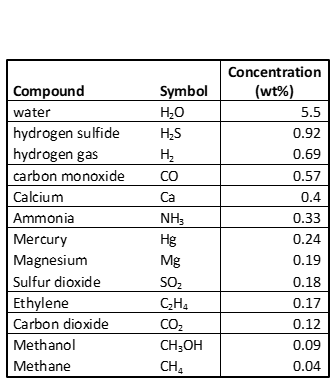) 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
#first method of creating a pandas dataframe. In this we manually created a dictionary of the values and converted to a dataframe. 
data = {'Compound':['water', 'hydrogen sulfide', 'hydrogen gas', 'carbon monoxide', 'calcium', 'ammonia','mercury','magnesium','sulfur dioxide','ethylene','carbon dioxide','methanol','methane'],
        'Symbol':['H2O','H2S','H2','CO','Ca','NH3','Hg','Mg','SO2','C2H4','CO2','CH3OH','CH4'],
        'Concentration (wt%)':[5.5,0.92,0.69,0.57,0.4,0.33,0.24,0.19,0.18,0.17,0.12,0.09,0.04]}
df = pd.DataFrame(data)
df

,Compound,Symbol,Concentration (wt%)
0,water,H2O,5.50
1,hydrogen sulfide,H2S,0.92
2,hydrogen gas,H2,0.69
3,carbon monoxide,CO,0.57
4,calcium,Ca,0.40
5,ammonia,NH3,0.33
6,mercury,Hg,0.24
7,magnesium,Mg,0.19
8,sulfur dioxide,SO2,0.18
9,ethylene,C2H4,0.17


In [4]:
pip install molmass #https://pypi.org/project/molmass/

     |████████████████████████████████| 71kB 3.6MB/s 


In [5]:
from molmass import Formula

In [6]:
f = Formula('')

f_composition=[]
f_composition_total=[]
lenlen=[]

for molecule in df['Symbol']:
  #print(molecule)
  f = Formula(molecule)
  #print(f.isotope.mass)
  #print(f.composition().total)
  f_composition.append(f.isotope.mass)
  f_composition_total.append(f.composition())
  lenlen.append(len(f.composition()))
  #f_molecule=f.formula
  #print(f_composition)
  #print(f_molecule)


element_name=[]
element_number=[]
element_rel_mass=[]
element_frac=[]
for i in range(len(f_composition_total)):
  for k in range(lenlen[i]):
    element_name.append(f_composition_total[i][k][0])
    element_number.append(f_composition_total[i][k][1])
    element_rel_mass.append(f_composition_total[i][k][2])
    element_frac.append(f_composition_total[i][k][3])

#print(len(element_name),len(element_number),len(element_rel_mass),len(element_frac))


new_frame={
    'VolatileCompound' : ['water','water','hydrogen sulfide','hydrogen sulfide','hydrogen gas','carbon monoxide','carbon monoxide','calcium','ammonia','ammonia','mercury','magnesium',
                  'sulfur dioxide','sulfur dioxide','ethylene','ethylene','carbon dioxide','carbon dioxide','methanol','methanol','methanol','methane','methane'],
    'Symbol' : ['H2O','H2O','H2S','H2S','H2','CO','CO','Ca','NH3','NH3','Hg','Mg','SO2','SO2','C2H4','C2H4','CO2','CO2','CH3OH','CH3OH','CH3OH','CH4','CH4'],
    'wt%' : [5.50,5.50,0.92,0.92,0.69,0.57,0.57,0.4,0.33,0.33,0.24,0.19,0.18,0.18,0.17,0.17,0.12,0.12,0.09,0.09,0.09,0.04,0.04],
    'Element': element_name,
    'Number' : element_number,
    'ElementRelMass' : element_rel_mass,
    'ElementFrac%' : element_frac
}
df_new_frame=pd.DataFrame(new_frame)
df_new_frame


,VolatileCompound,Symbol,wt%,Element,Number,ElementRelMass,ElementFrac%
0,water,H2O,5.50,H,2,2.015882,0.111898
1,water,H2O,5.50,O,1,15.999405,0.888102
2,hydrogen sulfide,H2S,0.92,H,2,2.015882,0.059150
3,hydrogen sulfide,H2S,0.92,S,1,32.064800,0.940850
4,hydrogen gas,H2,0.69,H,2,2.015882,1.000000
5,carbon monoxide,CO,0.57,C,1,12.010740,0.428800
6,carbon monoxide,CO,0.57,O,1,15.999405,0.571200
7,calcium,Ca,0.40,Ca,1,40.078000,1.000000
8,ammonia,NH3,0.33,H,3,3.023823,0.177553
9,ammonia,NH3,0.33,N,1,14.006703,0.822447


In [7]:
df_new_frame['ElementWt%']=df_new_frame['wt%']*(df_new_frame['ElementFrac%'])

In [8]:
df_new_frame

,VolatileCompound,Symbol,wt%,Element,Number,ElementRelMass,ElementFrac%,ElementWt%
0,water,H2O,5.50,H,2,2.015882,0.111898,0.615441
1,water,H2O,5.50,O,1,15.999405,0.888102,4.884559
2,hydrogen sulfide,H2S,0.92,H,2,2.015882,0.059150,0.054418
3,hydrogen sulfide,H2S,0.92,S,1,32.064800,0.940850,0.865582
4,hydrogen gas,H2,0.69,H,2,2.015882,1.000000,0.690000
5,carbon monoxide,CO,0.57,C,1,12.010740,0.428800,0.244416
6,carbon monoxide,CO,0.57,O,1,15.999405,0.571200,0.325584
7,calcium,Ca,0.40,Ca,1,40.078000,1.000000,0.400000
8,ammonia,NH3,0.33,H,3,3.023823,0.177553,0.058593
9,ammonia,NH3,0.33,N,1,14.006703,0.822447,0.271407


In [9]:
df_new_frame_groupby=df_new_frame.groupby(by=df_new_frame['Element']).sum().reset_index()
df_new_frame_groupby.sort_values(by="ElementWt%",ascending=False)

,Element,wt%,Number,ElementRelMass,ElementFrac%,ElementWt%
6,O,6.46,7,111.995835,3.185202,5.432240
2,H,7.74,21,21.166761,1.869466,1.464261
7,S,1.10,2,64.129600,1.441365,0.955674
0,C,0.99,6,72.064440,2.681521,0.486416
1,Ca,0.40,1,40.078000,1.000000,0.400000
5,N,0.33,1,14.006703,0.822447,0.271407
3,Hg,0.24,1,200.592000,1.000000,0.240000
4,Mg,0.19,1,24.305100,1.000000,0.190000


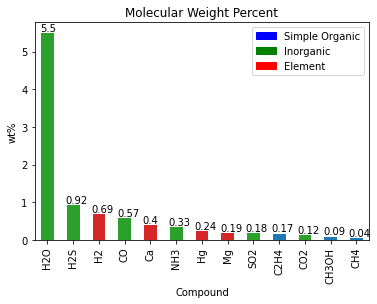

In [125]:
'''
Plot the Molecular Weight Percent from the LCROSS impact
C0 = blue, Simple Organic
C2 = green, Inorganic
C3 = red, Element
'''

colors = {'Simple Organic':'blue', 'Inorganic':'green', 'Element':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


df.plot(x='Symbol', y='Concentration (wt%)', kind='bar', color=['C2','C2','C3','C2','C3','C2','C3','C3','C2','C0','C2','C0','C0'])  
plt.ylabel('wt%')
plt.xlabel('Compound')
plt.title('Molecular Weight Percent')
all_axes = plt.gcf().get_axes()
ax = all_axes[0]

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x()-0.05 , p.get_height()+0.05 ))
plt.legend(handles, labels)
#plt.grid()
plt.show()

Figure 1. The Molecular Weight Percent from the LCROSS impact.

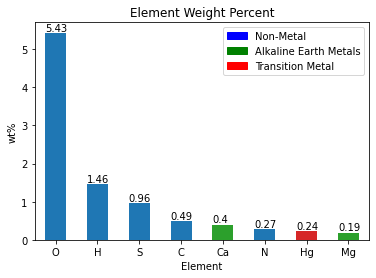

In [124]:
'''
Plot the Elemental Weight Percent
C0 = blue, non-metal
C2 = green, alkaline earth metals
C3 = red, transition metal
'''
colors = {'Non-Metal':'blue', 'Alkaline Earth Metals':'green', 'Transition Metal':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


df_elem_sort = df_new_frame_groupby.sort_values(by="ElementWt%",ascending=False)
df_elem_sort.plot(x='Element', y='ElementWt%', kind='bar', legend=False, rot=0, color=['C0','C0','C0','C0','C2','C0','C3','C2'])  
plt.ylabel('wt%')
plt.xlabel('Element')
plt.title('Element Weight Percent')
plt.legend(handles,labels)
all_axes = plt.gcf().get_axes()
ax = all_axes[0]

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() , p.get_height()+0.05 ))
#plt.grid()
plt.show()

Figure 2. The Elemental Weight Percent from the LCROSS impact summed across the molecular components. These plots show that Oxygen is the most abundant element by weight percent. However, the valuable element Carbon is nearly 0.5% by weight in this PSR. This could be a valuable secondary commodity during the production of water for Hydrogen and Oxygen rocket fuel.

Figure #. These plots show that Oxygen is the most abundant element by weight percent. However, the valuable element Carbon is nearly 0.5% by weight in this PSR. This could be a valuable secondary commodity during the production of water for Hydrogen and Oxygen rocket fuel. 

#Section 2 Geospatial Plotting of Lunar Rasters and Shapefile to Characterize the Cabeus Crater LCROSS impact site

We map the critical environmental characteristics of PSRs, inccluding Illumination, Temperature, Topography, and distance from the LCROSS impact site to have a semi-quantitative view of how far that "one" measurement can be extrapolated within the Cabeus crater. 

In [13]:
%pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others

     |████████████████████████████████| 1.4MB 5.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.3MB 241kB/s 
     |████████████████████████████████| 972kB 45.6MB/s 
     |████████████████████████████████| 6.5MB 37.1MB/s 
     |████████████████████████████████| 14.8MB 138kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=2c7efeb15bf1b4da3bcedacdb897c84615210c106429a7cb178503bc027dd63b
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [143]:
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from rasterio.plot import plotting_extent
from osgeo import gdal
import geopandas as gpd
import os

#Contour parameters. 
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar #need those for scalebar
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fontprops = fm.FontProperties(size=18)

In [15]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles

/content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles


In [16]:
Cabeus_Clipping=gpd.read_file('Cabeus_Clipping.shp')
Crashed_Spacecraft_LCROSS_Centaur=gpd.read_file('Crashed_Spacecraft_LCROSS_Centaur.shp')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15=gpd.read_file('Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shp')
Crashed_Spacecraft_LCROSS=gpd.read_file('Crashed_Spacecraft_LCROSS.shp')
PSRs_Cabeus_clp=gpd.read_file('PSRs_Cabeus_clp.shp')
SPole_Crater_Namesp=gpd.read_file('SPole_Crater_Names.shp')
Spole_DEM1000m_Contours_clp=gpd.read_file('Spole_DEM1000m_Contours_clp.shp')
USGS_LinearFeatures_Cabeus=gpd.read_file('USGS_LinearFeatures_Cabeus.shp')

In [30]:
Spole_DEM1000m_Contours_clp

,OBJECTID,Id,Contour,Shape_Leng,geometry
0,1,26,-1000.0,2744.812850,"LINESTRING (-55248.333 151675.000, -55247.857 ..."
1,2,31,0.0,91.843586,"LINESTRING (-71905.000 146709.444, -71909.167 ..."
2,3,32,0.0,63.164239,"LINESTRING (-74715.000 147265.000, -74721.667 ..."
3,4,33,0.0,407.515259,"LINESTRING (-74250.000 149005.000, -74250.000 ..."
4,5,34,0.0,34.727163,"LINESTRING (-74099.000 149549.000, -74095.000 ..."
...,...,...,...,...,...
528,529,1427,-1000.0,9397.810890,"LINESTRING (-115892.500 44000.000, -115905.000..."
529,530,1479,-1000.0,24295.631729,"MULTILINESTRING ((-132771.000 44000.000, -1327..."
530,531,1885,0.0,171045.011694,"LINESTRING (-35300.000 72117.857, -35301.364 7..."
531,532,3924,-1000.0,362337.035594,"LINESTRING (-35300.000 57027.857, -35301.364 5..."


In [17]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data
%ls

/content/gdrive/Shared drives/GEOL557_Group_Project/data
AVGVISIB_85S_060M_201608_clp20m.tfw
AVGVISIB_85S_060M_201608_clp20m.tif
AVGVIS_SUN60m.tif
polar_south_80_summer_max_sp240m_clp_float20m.tif
polar_south_80_summer_max_sp240m_clp_int16_20m.tfw
polar_south_80_summer_max_sp240m_clp_int16_20m.tif
Shapefiles/
spoledem10m_clp20m.tfw
spoledem10m_clp20m.tif
zold_data/


In [133]:
with rio.open('spoledem10m_clp20m.tif') as spDEM: #open the geotif file with RasterIO
      spDEM_np= spDEM.read(1)
      spDEM_plot_extent = plotting_extent(spDEM)
      
with rio.open('AVGVISIB_85S_060M_201608_clp20m.tif') as avgvis: #open the geotif file with RasterIO
      avgvis_np= avgvis.read(1)
      avgvis_plot_extent = plotting_extent(avgvis)

with rio.open('polar_south_80_summer_max_sp240m_clp_int16_20m.tif') as spTempSumMax: #open the geotif file with RasterIO
      spTempSumMax_np= spTempSumMax.read(1)
      spTempSumMax_plot_extent = plotting_extent(spTempSumMax)

In [134]:
spDEM_plot_extent #It defines the coordinates as a tuple in the appropriate order for matplotlib as:(leftmost coordinate, rightmost coordinate, bottom coordinate, top coordinate)

(-151500.0, -35300.0, 44000.0, 151680.0)

In [20]:
spDEM.crs

CRS.from_wkt('PROJCS["Moon2000_sp",GEOGCS["GCS_Moon_2000",DATUM["D_Moon_2000",SPHEROID["Moon_2000_IAU_IAG",1737400,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-90],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [135]:
spDEM_np #numpy array 
df_spDEM = pd.DataFrame(data=spDEM_np) #Numpy array to Pandas dataframe
df_spDEM.iloc[0:5, 0:10] #look at a corner of the data array

,0,1,2,3,4,5,6,7,8,9
0,-656,-657,-658,-660,-661,-661,-663,-664,-665,-665
1,-656,-657,-658,-659,-660,-661,-662,-663,-664,-665
2,-656,-657,-658,-659,-660,-661,-662,-663,-663,-665
3,-656,-657,-657,-658,-660,-661,-662,-662,-663,-664
4,-657,-657,-658,-659,-660,-661,-661,-662,-663,-664


In [139]:
df_avgvis = pd.DataFrame(data=avgvis_np) #Numpy array to Pandas dataframe
#df_avgvis.iloc[0:5, 0:10] #look at a corner of the Pandas data array
avgvis_np=np.where(avgvis_np==32767, 0, avgvis_np) #Modify the no data value from 32767 to 0
avgvis_np #numpy array 

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 2003, 2003, 2003],
       [   0,    0,    0, ..., 2003, 2003, 2003],
       [   0,    0,    0, ..., 2003, 2003, 2003]], dtype=int16)

In [140]:
spTempSumMax_np #numpy array 
df_spTempSumMax_np = pd.DataFrame(data=spTempSumMax_np) #Numpy array to Pandas dataframe
spTempSumMax_np=np.where(spTempSumMax_np==32767, 0, spTempSumMax_np) #Modify the no data value from 32767 to 0
spTempSumMax_np

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [135, 135, 135, ..., 207, 207, 207],
       [135, 135, 135, ..., 207, 207, 207],
       [135, 135, 135, ..., 207, 207, 207]], dtype=int16)

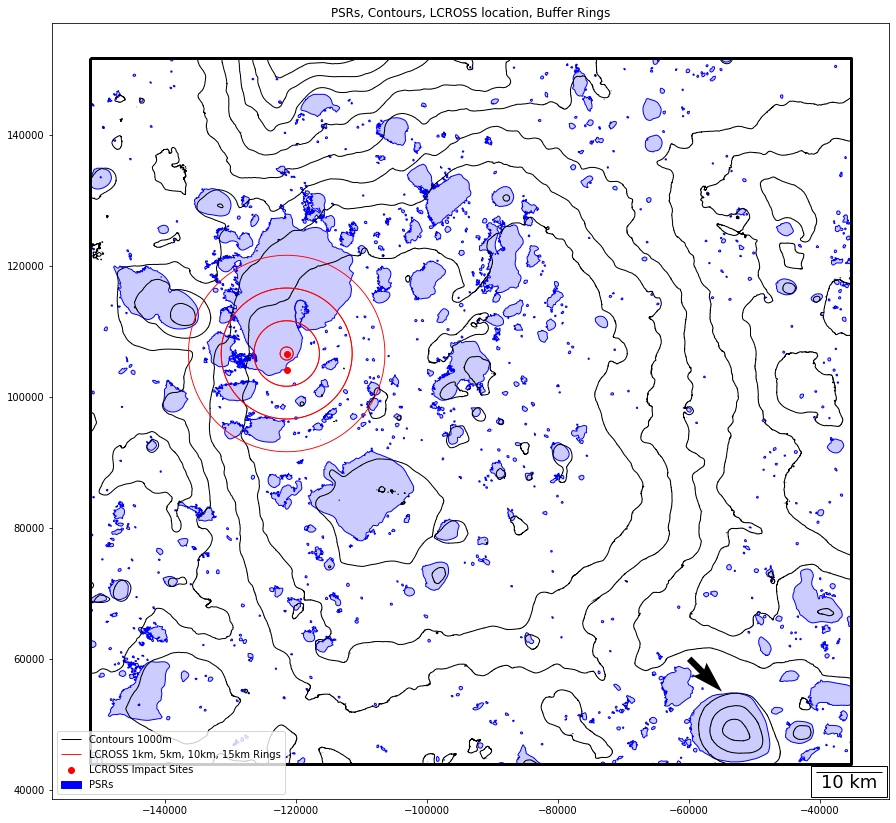

In [145]:
#Display imported shapefiles
fig, ax = plt.subplots(figsize=(15, 15))

#Shapefiles 
Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("PSRs, Contours, LCROSS location, Buffer Rings")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

blue_patch = mpatches.Patch(color='b')

handles.append(blue_patch)
labels.append('PSRs')

ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 3. The shapefiles imported from ArcGIS to provide context for the LCROSS impact site. The blue PSR blobs are the locations that have temperatres below the water stability temperature 110 K. The arrow points to Lunar South Pole.

In [26]:
# Plot the DEM and hillshade at the same time
# https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_spDEM, azimuth=315, altitude=45)

#hillshade = es.hillshade(df_avgvis, azimuth=-30, altitude=30)

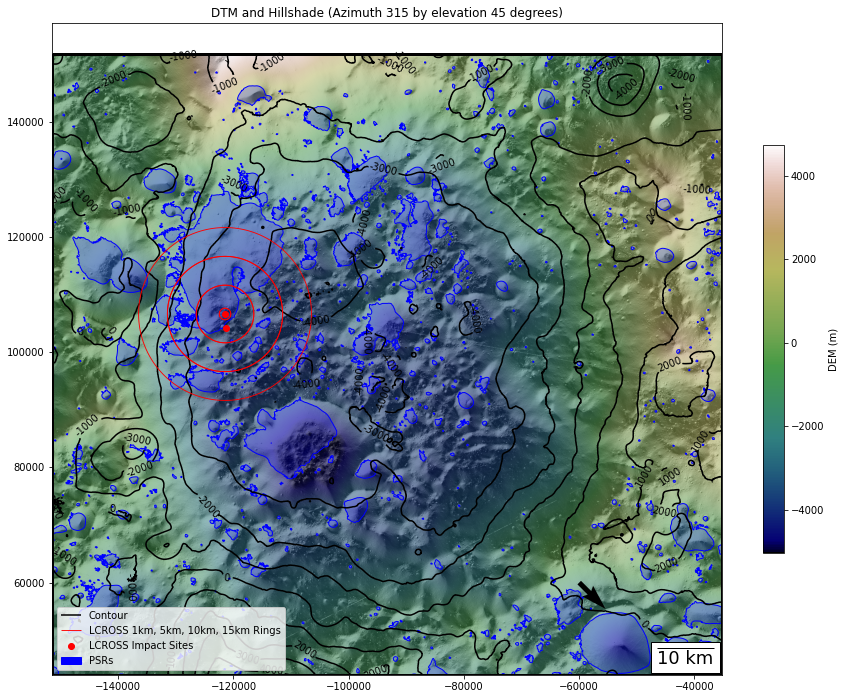

In [146]:
#Plot DEM, shapefiles, and contours
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
#ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 500)), cmap = "Greys") 
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[i].set_label('Contour')
#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()


# ep.plot_bands(
#     df_spDEM,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spDEM_plot_extent   
# )
im=ax.imshow(df_spDEM, cmap="gist_earth", extent=spDEM_plot_extent)
#im1 = ax1.imshow(f(x, y), cmap=plt.get_cmap('viridis'), animated=True)
fig.colorbar(im, ax=ax, shrink=.5, label='DEM (m)')

#Overlay hillshade with alpha transparance
ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spDEM_plot_extent)

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("DTM and Hillshade (Azimuth 315 by elevation 45 degrees)")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)


blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 4. DEM of Lunar South Pole original 10 m resampled to 20 m. Arrow points to Lunar South Pole and also shows the artifical Hillshade lighting direction.  
Reference: 

https://pds-geosciences.wustl.edu/lro/lro-l-lola-3-rdr-v1/lrolol_1xxx/data/lola_gdr/polar/jp2/ldem_875s_10m.jp2

https://pds-geosciences.wustl.edu/lro/lro-l-lola-3-rdr-v1/lrolol_1xxx/data/lola_gdr/polar/jp2/ldem_875s_10m_jp2.lbl

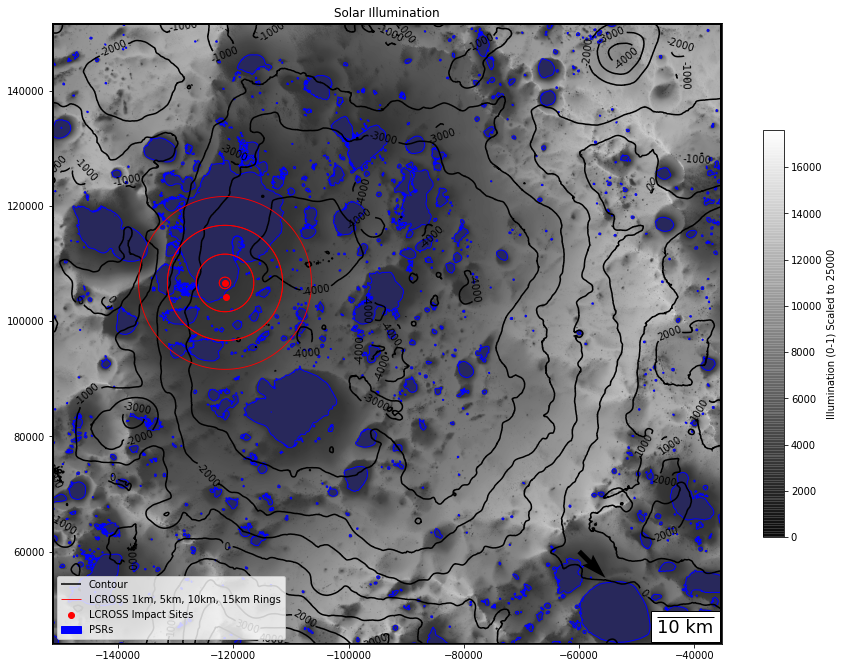

In [147]:
#plot the illumination, shapefiles, and contours
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
#ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 500)), cmap = "Greys") 
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[i].set_label('Contour')
#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

# ep.plot_bands(
#     df_avgvis,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spDEM_plot_extent   
# )
im=ax.imshow(df_avgvis, cmap="gray", extent=avgvis_plot_extent, alpha=.8)
fig.colorbar(im, ax=ax, shrink=.5, label='Illumination (0-1) Scaled to 25000')

#Overlay hillshade with alpha transparance
#ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=avgvis_plot_extent)

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("Solar Illumination")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)


blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 5. Illumination of Lunar South Pole original 60 m resampled to 20 m. Arrow points to Lunar South Pole.
Reference: 
Mazarico, E., et al. (2011), Illumination conditions of the lunar polar regions using LOLA topography, Icarus, Vol. 211, pp. 1066-1081, doi:10.1016/j.icarus.2010.10.030.

https://pgda.gsfc.nasa.gov/products/69
http://imbrium.mit.edu/EXTRAS/ILLUMINATION/JP2/AVGVISIB_85S_060M_201608.JP2


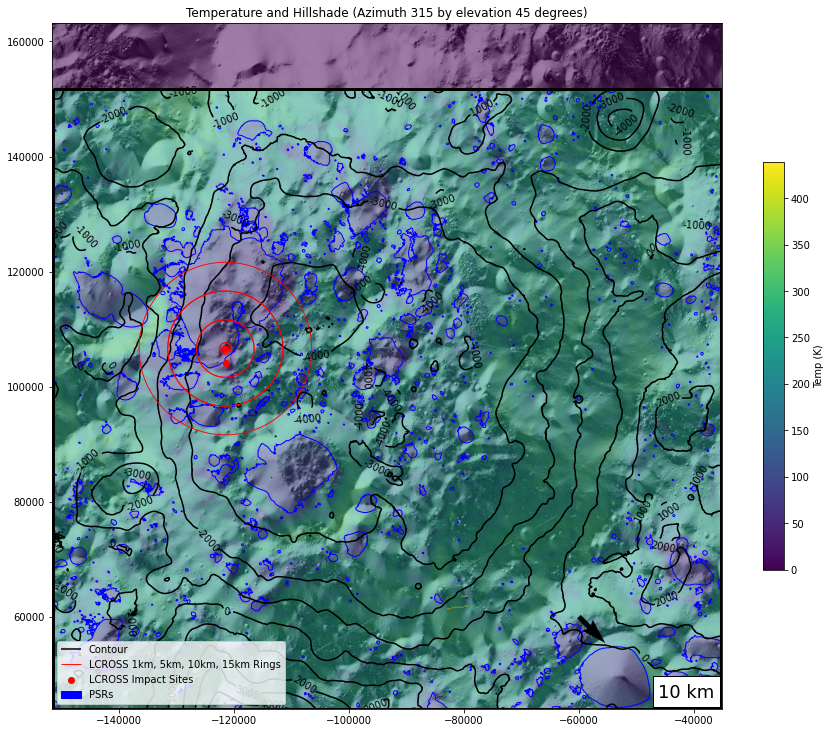

In [148]:
#Temperature, hillshade, contours, and shapefiles
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
#CStemp=ax.contour(spTempSumMax_np,  levels = list(range(0, 400, 100)), colors = "red", extent=spTempSumMax_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[i].set_label('Contour')

#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
#PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

# ep.plot_bands(
#     spTempSumMax_np,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spTempSumMax_plot_extent   
# )
im=ax.imshow(spTempSumMax_np, cmap="viridis", extent=spTempSumMax_plot_extent)
fig.colorbar(im, ax=ax, shrink=.5, label='Temp (K)')
#Overlay hillshade with alpha transparance
ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spTempSumMax_plot_extent)
#Create contour plot at specified range of values
#ax.contour(spTempSumMax_np,  levels =  list(110), color = "red",) 

scalebar = AnchoredSizeBar(ax.transData,
                           10, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("Temperature and Hillshade (Azimuth 315 by elevation 45 degrees)")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 6. Temperature of Lunar South Pole original 240 m resampled to 40 m. Arrow points to Lunar South Pole. The area in the blue shade of the PSR polygon (less than 110 K for water ice stability). To the north of the impact location it appears to have similar conditions further away from the LCROSS impact site. South and east of the site the conditions change within a couple of kilometers of the impact site. 

Reference:

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/additional_maps/polar_north_80_sw_max_diff.txt

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/additional_maps/polar_north_80_summer_max.txt
____________________
README for Seasonal Polar Temperatures on the Moon

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/aareadme.txt

#Extra Stuff

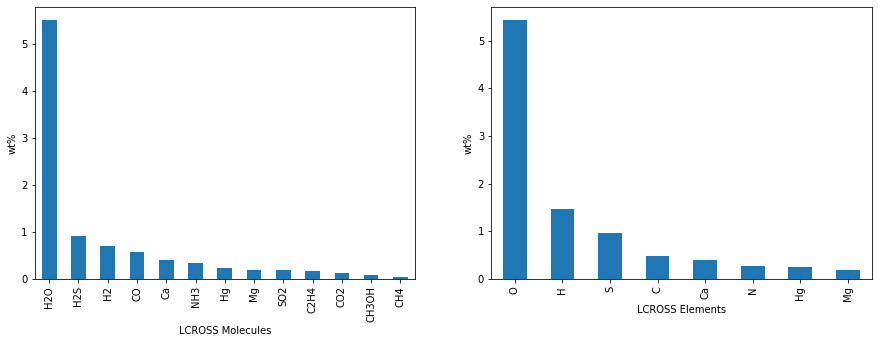

In [12]:
#We will place the molecular and elemental plots side by side in the final version. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15,5])
df[["Symbol","Concentration (wt%)"]].plot(ax=axes[0], x='Symbol', kind='bar', legend=False, ylabel='wt%', xlabel='LCROSS Molecules')
df_elem_sort[["Element", "ElementWt%"]].plot(ax=axes[1], x='Element', kind='bar',legend=False, ylabel='wt%', xlabel='LCROSS Elements')
plt.show()